# 03717357 COMP6940 A5 V2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error,f1_score,classification_report,confusion_matrix
from math import sqrt, isnan

In [2]:
# lets import the energy data and have a quick look
df = pd.read_csv('energydata.csv')
print(df.shape)
df.head(10)

(36168, 9)


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087
5,MAC000048,2011-12-13,0.0890,0.094813,0.116,48,0.010394,4.551,0.087
6,MAC000048,2011-12-14,0.0890,0.100250,0.367,48,0.040702,4.812,0.085
7,MAC000048,2011-12-15,0.1005,0.171625,1.287,48,0.200874,8.238,0.092
8,MAC000048,2011-12-16,0.5320,0.612542,1.591,48,0.325779,29.402,0.095
9,MAC000048,2011-12-17,0.0980,0.204313,0.995,48,0.222470,9.807,0.094


In [3]:
# the column LCLid sems like some sort of household identifier....but only if the dates repeat.
# lets check the unique LCLid's and double check a given day has all of them
print(df['LCLid'].unique())
df.sort_values('day').head(100)

['MAC000048' 'MAC000064' 'MAC000075' 'MAC000076' 'MAC000082' 'MAC000141'
 'MAC000165' 'MAC000173' 'MAC000315' 'MAC002313' 'MAC002317' 'MAC002319'
 'MAC002321' 'MAC002322' 'MAC002326' 'MAC002330' 'MAC002333' 'MAC002338'
 'MAC002340' 'MAC002341' 'MAC002343' 'MAC002355' 'MAC002359' 'MAC002360'
 'MAC002361' 'MAC002907' 'MAC003603' 'MAC004458' 'MAC004463' 'MAC004468'
 'MAC004470' 'MAC004471' 'MAC004473' 'MAC004474' 'MAC004476' 'MAC004477'
 'MAC004480' 'MAC004482' 'MAC004487' 'MAC004496' 'MAC004500' 'MAC004510'
 'MAC004511' 'MAC004512' 'MAC004517' 'MAC004518' 'MAC004519' 'MAC005263'
 'MAC005267' 'MAC005555']


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
4869,MAC000165,2011-11-24,0.1670,0.217208,0.795,24,0.169183,5.213,0.088
4870,MAC000165,2011-11-25,0.1135,0.164187,0.860,48,0.141379,7.881,0.063
5697,MAC000173,2011-11-25,0.1400,0.160231,0.366,26,0.086432,4.166,0.037
5698,MAC000173,2011-11-26,0.0760,0.121979,0.721,48,0.123860,5.855,0.035
4871,MAC000165,2011-11-26,0.1970,0.199833,0.470,48,0.106554,9.592,0.062
4872,MAC000165,2011-11-27,0.1640,0.199813,0.833,48,0.141030,9.591,0.062
5699,MAC000173,2011-11-27,0.0830,0.150000,0.843,48,0.150246,7.200,0.036
4873,MAC000165,2011-11-28,0.1290,0.175833,0.905,48,0.159578,8.440,0.061
5700,MAC000173,2011-11-28,0.1125,0.146667,0.441,48,0.110991,7.040,0.037
5701,MAC000173,2011-11-29,0.0800,0.129396,0.412,48,0.100368,6.211,0.034


In [4]:
# ok so a given day does not have all LCLid values, but some have more than one. Since the assignment just mentioned
# one entry per date I'll just take the Average over that date
energy = df[['day','energy_sum']].sort_values('day')
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d')
energy.set_index('day',inplace=True)
energy = energy.resample('D').mean() # average the energy sum to get 1 entry per date
print(energy.shape)
print(energy.isnull().any()) # check for Nan
energy.head()

(828, 1)
energy_sum    False
dtype: bool


,energy_sum
day,
2011-11-24,5.2130
2011-11-25,6.0235
2011-11-26,7.7235
2011-11-27,8.3955
2011-11-28,7.7400


In [5]:
# lets read in the weather data
df1 = pd.read_csv('weather_daily_darksky.csv')
weather = df1[['temperatureHigh','time']].sort_values('time')
weather.time = pd.to_datetime(weather.time,format='%Y-%m-%d')
# not sure if there are duplicate dates her but a similar resample should take care of it anyway.
weather = weather.set_index('time')
weather.index = weather.index.round('D') # round to the nearest day
weather = weather.resample('D').mean()# average the tmeperature to get 1 entry per date
print(weather.shape)
print(weather.isnull().any()) # check for Nan
weather.head()

(882, 1)
temperatureHigh    False
dtype: bool


,temperatureHigh
time,
2011-11-01,15.57
2011-11-02,15.06
2011-11-03,17.41
2011-11-04,15.54
2011-11-05,13.94


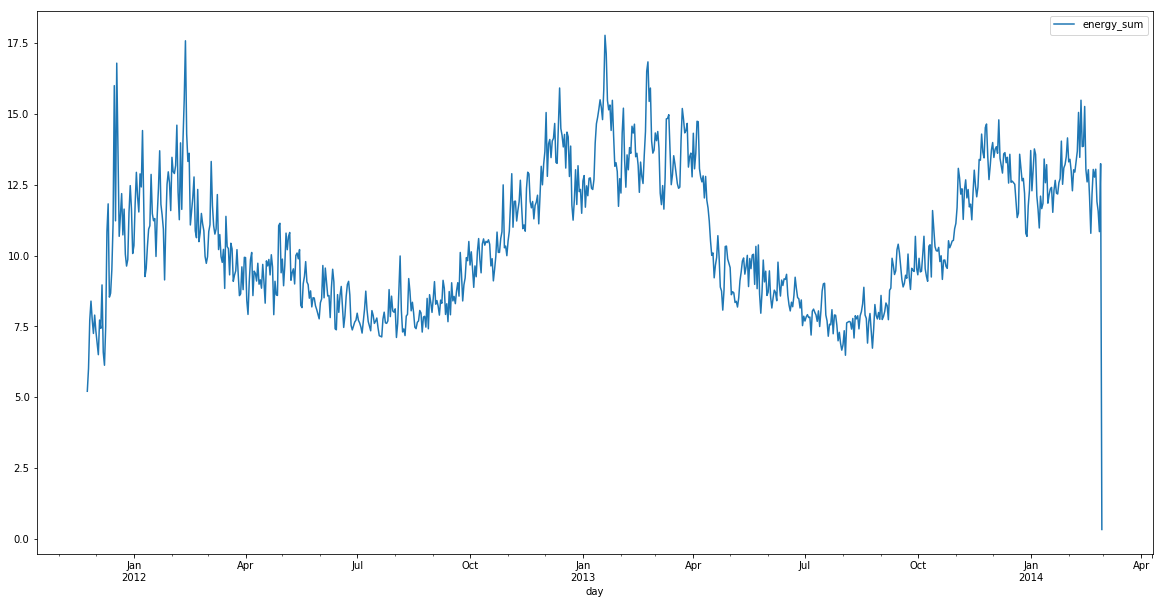

In [6]:
energy.plot(figsize=(20,10))

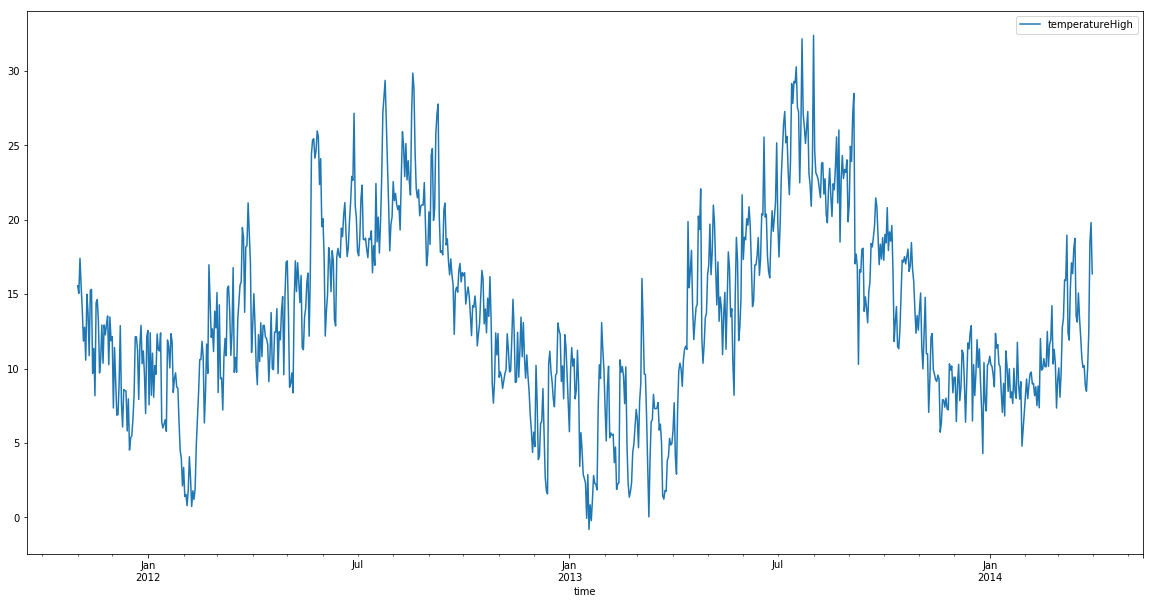

In [7]:
weather.plot(figsize=(20,10))

# Identify any trends in the datasets and discuss if trends in weather are related to trends inenergy consumption.
Off the top of my head I would have to say that energy consumption is higher in winter months December to February.
Temperature naturally is also lower overall in those months.

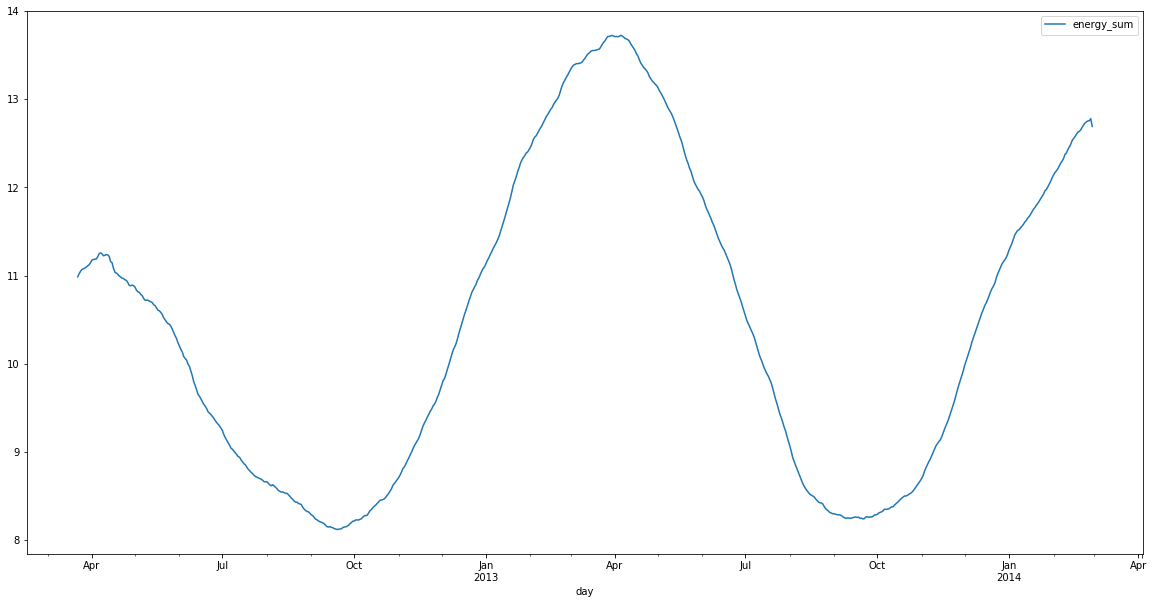

In [8]:
# lets use a 4 month(120 day) rolling average for energy
energy.rolling(120).mean().plot(figsize=(20,10))

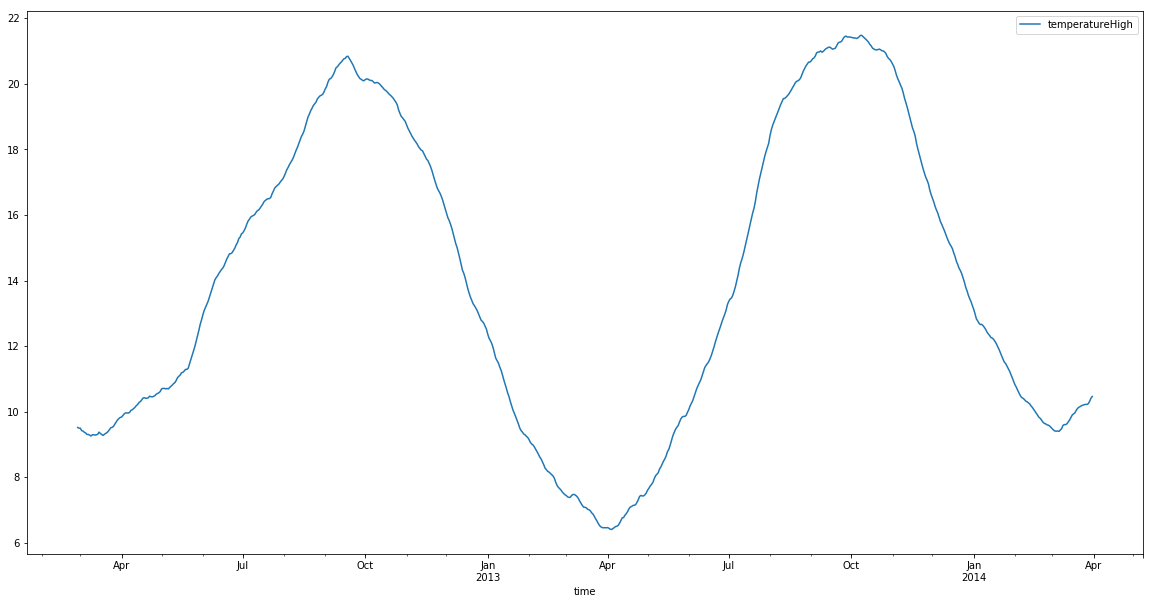

In [9]:
# lets use a 4 month(120 day) rolling average for energy
weather.rolling(120).mean().plot(figsize=(20,10))

# Identify Seasonal patterns in the datasets and discuss if seasonality in weather are related to seasonality in energy consumption

OK so using a 4 month rolling mean did the trick here. We can clearly see an inverse relationship between energy consusumption and Temperature. Temperatures are at their lowest in March-April and Energy consumption is at its highest.

In [10]:
# lets define our own exponetial smoothing function
def exponential_smoothing(series,alpha):
    result = [series[0]] # value is same at time 0
    for index in range(1,len(series)): # must start from 1
        # next = current * alpha + (1-alpha) * previous prediction
        result.append(alpha * series[index - 1] + (1 - alpha) * result[index -1]) 
    return result

# Forecast using simple exponential smoothing the expected temperature  for 2014 ,use the RMS metric to indicate the accuracy of your forecast.
1. Choose the alpha that results in the lowest RMS
2. Plot a graph showing the actual value and the forecasted values

In [11]:
train = weather[weather.index.year < 2014]
test = weather[weather.index.year == 2014]

(0.73, 2.0310224457379955)


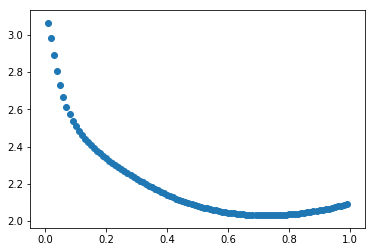

In [12]:
y_hat_avg = test.copy()
ans = []
for x in range(1,100): # test alphas [0.01,1)
    alpha = x / 100.0
    y_hat_avg['SES'] = np.array(exponential_smoothing(y_hat_avg.temperatureHigh,alpha))
    rms = sqrt(mean_squared_error(test.temperatureHigh, y_hat_avg.SES))
    ans.append((alpha,rms))
print(min(ans,key=lambda x : x[1])) # find the minimum value
plt.scatter(*zip(*ans))

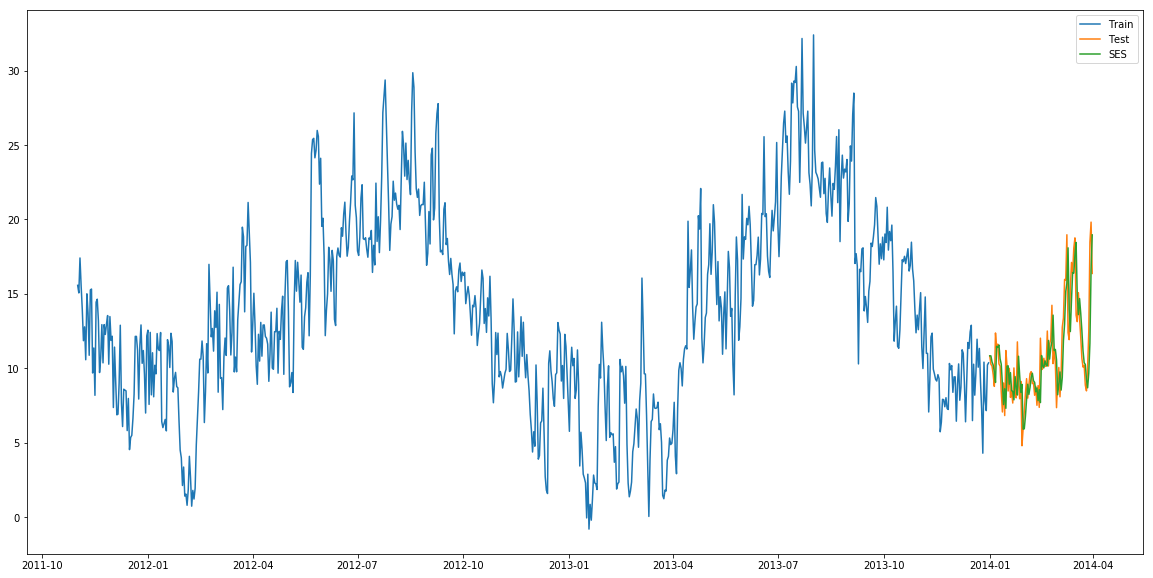

In [13]:
# looks like the best value is 0.73
y_hat_avg = test.copy()
# y_hat_avg['SES'] = test.ewm(span=1).mean()
alpha = 0.73
y_hat_avg['SES'] = np.array(exponential_smoothing(y_hat_avg.temperatureHigh,alpha))
plt.figure(figsize=(20,10))
plt.plot(train['temperatureHigh'], label='Train')
plt.plot(test['temperatureHigh'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

# Forecast using simple exponential smoothing the expected energy consumption for 2014 ,use the RMS metric to indicate the accuracy of your forecast.
1. Choose the alpha that results in the lowest RMS
2. Plot a graph showing the actual value and the forecasted values

In [14]:
train2 = energy[energy.index.year < 2014]
test2 = energy[energy.index.year == 2014]

(0.38, 1.774467017378334)


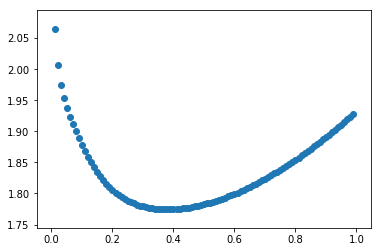

In [15]:
y_hat_avg2 = test2.copy()
ans = []
for x in range(1,100):
    alpha = x / 100.0
    y_hat_avg2['SES'] = np.array(exponential_smoothing(y_hat_avg2.energy_sum,alpha))
    rms = sqrt(mean_squared_error(test2.energy_sum, y_hat_avg2.SES))
    ans.append((alpha,rms))
print(min(ans,key=lambda x : x[1])) # find the minimum value 
plt.scatter(*zip(*ans))

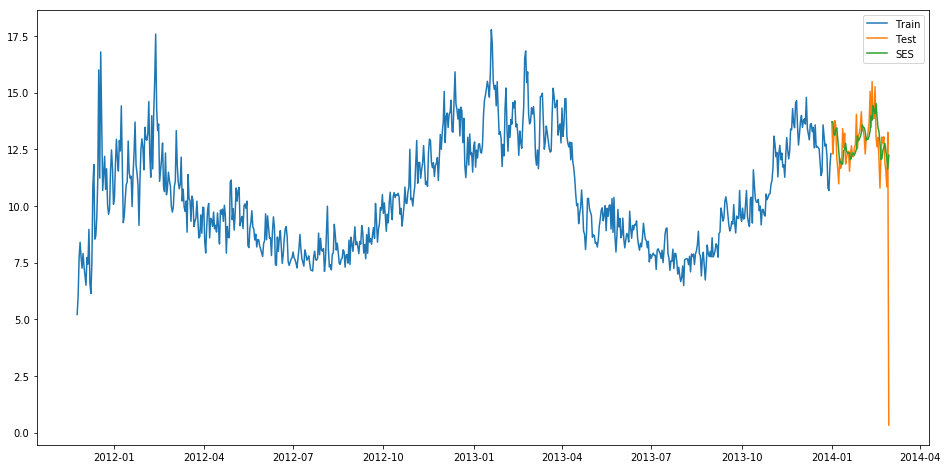

In [16]:
# looks like the best alpha is 0.38
y_hat_avg2 = test2.copy()
alpha = 0.38
y_hat_avg2['SES'] = np.array(exponential_smoothing(y_hat_avg2.energy_sum,alpha))
plt.figure(figsize=(16,8))
plt.plot(train2['energy_sum'], label='Train')
plt.plot(test2['energy_sum'], label='Test')
plt.plot(y_hat_avg2['SES'], label='SES')
plt.legend(loc='best')
plt.show()

# Combine the initial datasets using an appropriate column as the index. Indicate why you chose that index.

In [17]:
# lets have a look at the energy data again
df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087


In [18]:
# So the day column is the obvious choice her for an index to merge on provided we can find one that is similar in the weather
# dataset. So lets have a look at that again.
df1.iloc[:,:15].head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00


In [19]:
df1.iloc[:,15:].head()

,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [20]:
# lets check the number of unique times in each 'timish' column
for col in df1.columns:
    if "Time" in col:
        print(col, len(df1[col].unique()))

temperatureMaxTime 882
temperatureMinTime 882
apparentTemperatureMinTime 882
apparentTemperatureHighTime 882
sunsetTime 882
sunriseTime 882
temperatureHighTime 882
uvIndexTime 882
temperatureLowTime 882
apparentTemperatureMaxTime 882
apparentTemperatureLowTime 882


In [21]:
# so all the times are trying to do the same thing, so lets go with the choice used in the analysis above which was 'time'
# first things first....lets take the energy data and make 'day' the new index, agregating values by average
energy2 = df.copy()
energy2.day = pd.to_datetime(energy2.day,format='%Y-%m-%d')
energy2.set_index('day',inplace = True)
print(energy2.shape)
energy2.head()

(36168, 8)


,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2011-12-08,MAC000048,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
2011-12-09,MAC000048,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2011-12-10,MAC000048,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
2011-12-11,MAC000048,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
2011-12-12,MAC000048,0.0950,0.123188,0.326,48,0.057947,5.913,0.087


In [22]:
# lets drop the LCLid column since its an identifier for a household, and agregate the othger values by day
energy2 = energy2.drop('LCLid').resample('D').mean()
print(energy2.shape)
print(energy2.isnull().any()) # check for Nan
energy2.head()

(828, 7)
energy_median    False
energy_mean      False
energy_max       False
energy_count     False
energy_std        True
energy_sum       False
energy_min       False
dtype: bool


,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,
2011-11-24,0.16700,0.217208,0.7950,24.0,0.169183,5.2130,0.0880
2011-11-25,0.12675,0.162209,0.6130,37.0,0.113906,6.0235,0.0500
2011-11-26,0.13650,0.160906,0.5955,48.0,0.115207,7.7235,0.0485
2011-11-27,0.12350,0.174906,0.8380,48.0,0.145638,8.3955,0.0490
2011-11-28,0.12075,0.161250,0.6730,48.0,0.135285,7.7400,0.0490


In [23]:
# noting 1 column with Nans to fill
# now lets work on the weather dataset to make it more day like
weather2 = df1.copy()
weather2.rename(columns={'time':'day'},inplace=True) # rename time to day for asthetics
# now lets drop all other 'timeish' columns since they will be of no use
cols2drop = [x for x in weather2.columns if "Time" in x]
weather2.drop(cols2drop,axis=1,inplace=True)
weather2.day = pd.to_datetime(weather2.day,format='%Y-%m-%d')
weather2.set_index('day',inplace=True)
weather2.index = weather2.index.round('D') # round to the nearest day as before
weather2 = weather2.resample('D').mean()# average the rows to get 1 entry per date and automatically drop non numeric columns
print(weather2.shape)
print(weather2.isnull().any()) # check for Nan
weather2.head()

(882, 17)
temperatureMax             False
windBearing                False
dewPoint                   False
cloudCover                  True
windSpeed                  False
pressure                   False
apparentTemperatureHigh    False
visibility                 False
humidity                   False
apparentTemperatureLow     False
apparentTemperatureMax     False
uvIndex                     True
temperatureLow             False
temperatureMin             False
temperatureHigh            False
apparentTemperatureMin     False
moonPhase                  False
dtype: bool


,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
day,,,,,,,,,,,,,,,,,
2011-11-01,15.57,208,10.13,0.36,2.45,1009.46,15.57,12.68,0.84,7.33,15.57,1.0,8.88,9.68,15.57,9.01,0.21
2011-11-02,15.19,134,10.23,0.39,4.39,1004.79,15.06,11.83,0.87,13.99,15.19,1.0,13.99,8.88,15.06,7.33,0.24
2011-11-03,17.41,154,13.39,0.52,3.99,993.40,17.41,12.15,0.89,12.52,17.41,1.0,12.52,12.79,17.41,12.79,0.27
2011-11-04,15.54,179,12.03,0.50,2.62,995.54,15.54,10.69,0.91,10.17,15.54,1.0,10.17,11.53,15.54,11.53,0.31
2011-11-05,13.94,346,10.96,0.65,2.70,1007.39,13.94,4.60,0.92,7.03,13.94,1.0,9.46,10.17,13.94,10.17,0.34


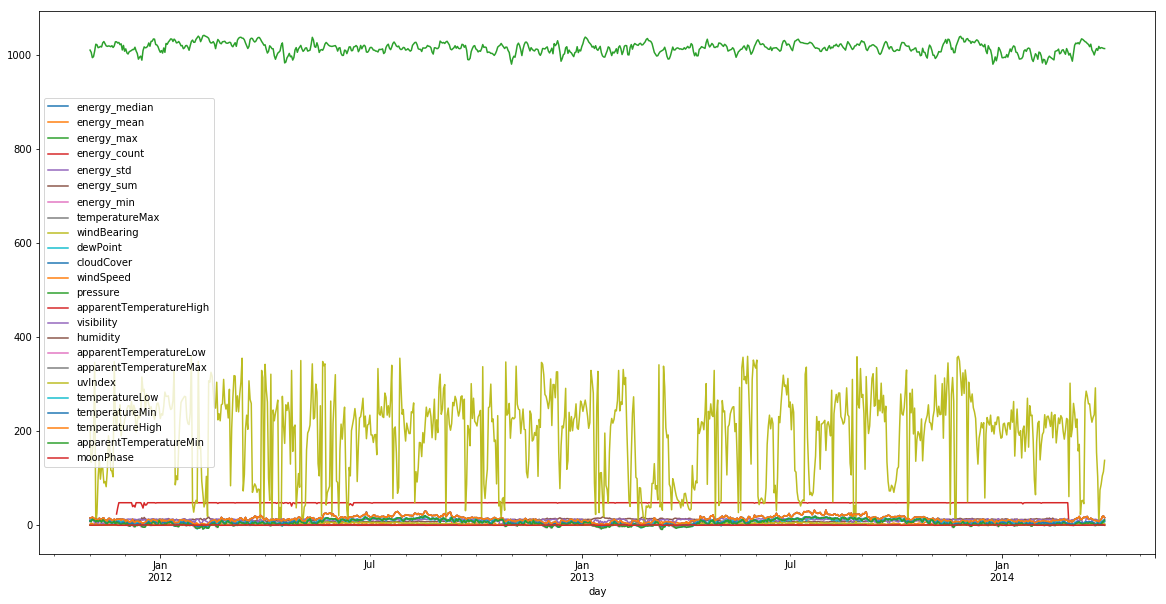

In [24]:
# noting 2 columns with Nans to fill. Lets merge these datasets together now  that they have similar indicies
# combining based on the time index makes the most sense, since we can build one to one relations just using a date to
# the nearest day.
combined = pd.concat([energy2,weather2], axis=1)
combined.plot(figsize=(20,10))

In [25]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 882 entries, 2011-11-01 to 2014-03-31
Freq: D
Data columns (total 24 columns):
energy_median              828 non-null float64
energy_mean                828 non-null float64
energy_max                 828 non-null float64
energy_count               828 non-null float64
energy_std                 827 non-null float64
energy_sum                 828 non-null float64
energy_min                 828 non-null float64
temperatureMax             882 non-null float64
windBearing                882 non-null int64
dewPoint                   882 non-null float64
cloudCover                 881 non-null float64
windSpeed                  882 non-null float64
pressure                   882 non-null float64
apparentTemperatureHigh    882 non-null float64
visibility                 882 non-null float64
humidity                   882 non-null float64
apparentTemperatureLow     882 non-null float64
apparentTemperatureMax     882 non-null float64
uvInde

In [26]:
combined.head()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,windBearing,dewPoint,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
day,,,,,,,,,,,,,,,,,,,,,
2011-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.57,208,10.13,...,12.68,0.84,7.33,15.57,1.0,8.88,9.68,15.57,9.01,0.21
2011-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.19,134,10.23,...,11.83,0.87,13.99,15.19,1.0,13.99,8.88,15.06,7.33,0.24
2011-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.41,154,13.39,...,12.15,0.89,12.52,17.41,1.0,12.52,12.79,17.41,12.79,0.27
2011-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.54,179,12.03,...,10.69,0.91,10.17,15.54,1.0,10.17,11.53,15.54,11.53,0.31
2011-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.94,346,10.96,...,4.60,0.92,7.03,13.94,1.0,9.46,10.17,13.94,10.17,0.34


In [27]:
# we notice missing energy data. Lets only keep combined data from the minimum date of energy2 to the max date of energy2.
# Lets also fill the nan values we saw earlier with mean values
minenergyday = energy2.index.min()
maxenergyday = energy2.index.max()
maxweatherday = weather2.index.max()
print(minenergyday,maxenergyday,maxweatherday)
# since later on the energy_sum variable will define the class varibale we can safely just keep that range
combined = combined[minenergyday:maxenergyday]
#lets replace the Nans in cloudCover, uvIndex and energy_std with the mean
for col in ['cloudCover', 'uvIndex','energy_std']:
    avg = combined[col].mean()
    combined[col] = combined[col].apply(lambda x : avg if isnan(x) else x)
combined.isnull().any()

2011-11-24 00:00:00 2014-02-28 00:00:00 2014-03-31 00:00:00


energy_median              False
energy_mean                False
energy_max                 False
energy_count               False
energy_std                 False
energy_sum                 False
energy_min                 False
temperatureMax             False
windBearing                False
dewPoint                   False
cloudCover                 False
windSpeed                  False
pressure                   False
apparentTemperatureHigh    False
visibility                 False
humidity                   False
apparentTemperatureLow     False
apparentTemperatureMax     False
uvIndex                    False
temperatureLow             False
temperatureMin             False
temperatureHigh            False
apparentTemperatureMin     False
moonPhase                  False
dtype: bool

# 6. Plot separate graphs showing the "temperatureHigh" and "energy_sum" data from the combined dataset.

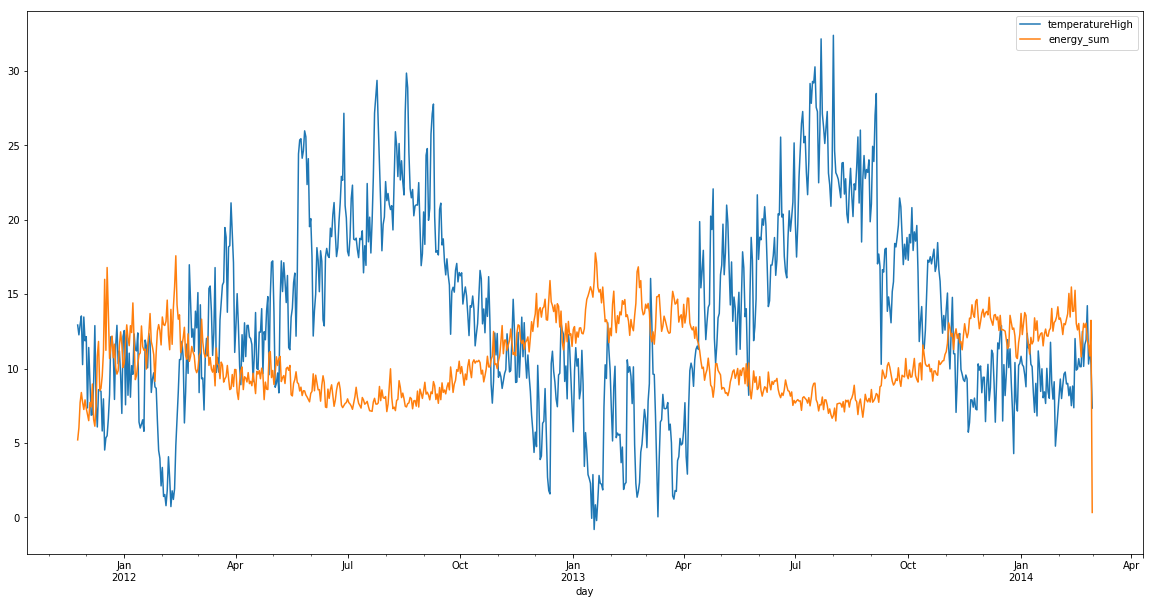

In [28]:
combined[['temperatureHigh','energy_sum']].plot(figsize=(20,10))


# 7. Discuss what observations can be made from the plot with the combined data vs the plots from the individual datasets.

I draw the same conclusions i did originally. There is an inverse relationship on average between Temperature and Energy consumed.

# Part 3: Prediction 30 marks
## This section relies on the combined dataset from part 2 question 5.
Tasks
1. Create a new column in the dataset, derived from the "energy_sum" values, which indicates if energy consumption was high or low. An appropriate threshold should be used to determine whether or not energy consumption was high or low. Justify the threshold value you chose.
2. Split the dataset into a train and test set. The train set should be all the data before 2014 and the test set should be all data from 2014.
3. Choose the appropriate columns to be used for training. Give a brief explanation why those columns were chosen.
4. Use an appropriate classifier to predict the energy consumption for 2014
5. Show the performance of the classifier using an appropriate metric.

In [29]:
#lets drop the dates that dont have an energy Sum.
combined.dropna(inplace=True)
# Let the class seperator by equal to the average energy consumption since the pattern seems a bit sinusoidal.
avg = combined['energy_sum'].mean()
# lets use 1 to indicate high consumption and 0 for low
combined['Class'] = np.where(combined['energy_sum']>avg, 1, 0)
combined.head(10)

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,windBearing,dewPoint,...,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Class
day,,,,,,,,,,,,,,,,,,,,,
2011-11-24,0.16700,0.217208,0.7950,24.0,0.169183,5.2130,0.0880,12.93,204,8.56,...,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97,0
2011-11-25,0.12675,0.162209,0.6130,37.0,0.113906,6.0235,0.0500,13.03,243,7.24,...,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01,0
2011-11-26,0.13650,0.160906,0.5955,48.0,0.115207,7.7235,0.0485,12.96,237,6.96,...,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05,0
2011-11-27,0.12350,0.174906,0.8380,48.0,0.145638,8.3955,0.0490,13.54,256,5.76,...,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08,0
2011-11-28,0.12075,0.161250,0.6730,48.0,0.135285,7.7400,0.0490,12.58,190,4.39,...,0.86,10.27,12.58,1.0,10.27,1.31,10.27,1.31,0.12,0
2011-11-29,0.10875,0.151135,0.4990,48.0,0.109901,7.2545,0.0455,13.47,213,8.61,...,0.82,3.34,13.47,1.0,6.34,6.37,13.47,3.39,0.15,0
2011-11-30,0.13300,0.164615,0.6565,48.0,0.127193,7.9015,0.0475,11.87,205,5.26,...,0.78,6.23,11.87,1.0,9.44,6.34,11.87,3.34,0.19,0
2011-12-01,0.10025,0.152792,0.7430,48.0,0.136070,7.3340,0.0455,12.15,225,6.87,...,0.82,0.46,12.15,1.0,2.56,6.08,12.15,5.29,0.22,0
2011-12-02,0.09375,0.143750,0.6425,48.0,0.121374,6.9000,0.0465,8.07,232,3.69,...,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25,0


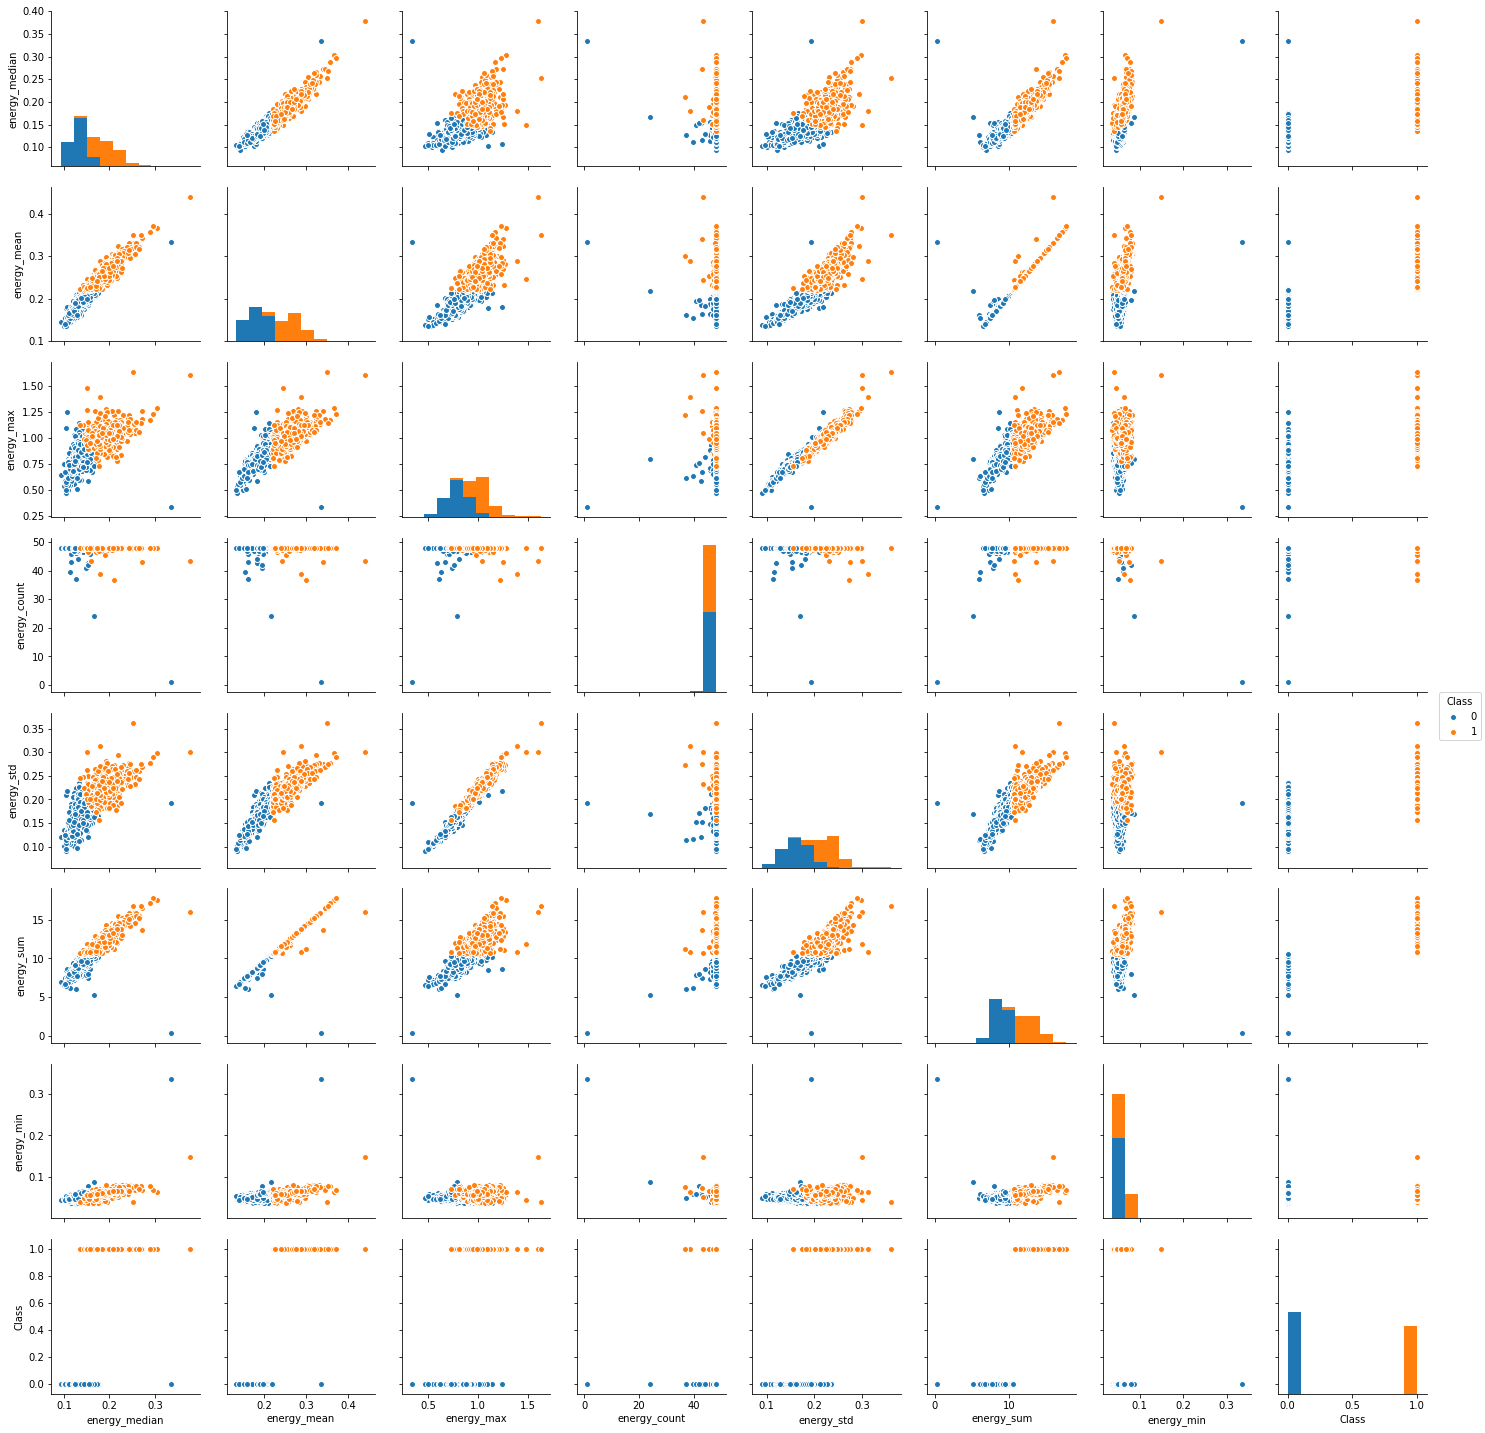

In [52]:
# Its a key assumption of most classifiers that features are independant. Since we used energy_sum to derive the class variable
# there is a chance the other energy variable are related to class variable as well. Lets look at a pairplot
cols = [x for x in combined.columns if "energy" in x]
cols.append('Class')
sns.pairplot(data=combined[cols],hue='Class')

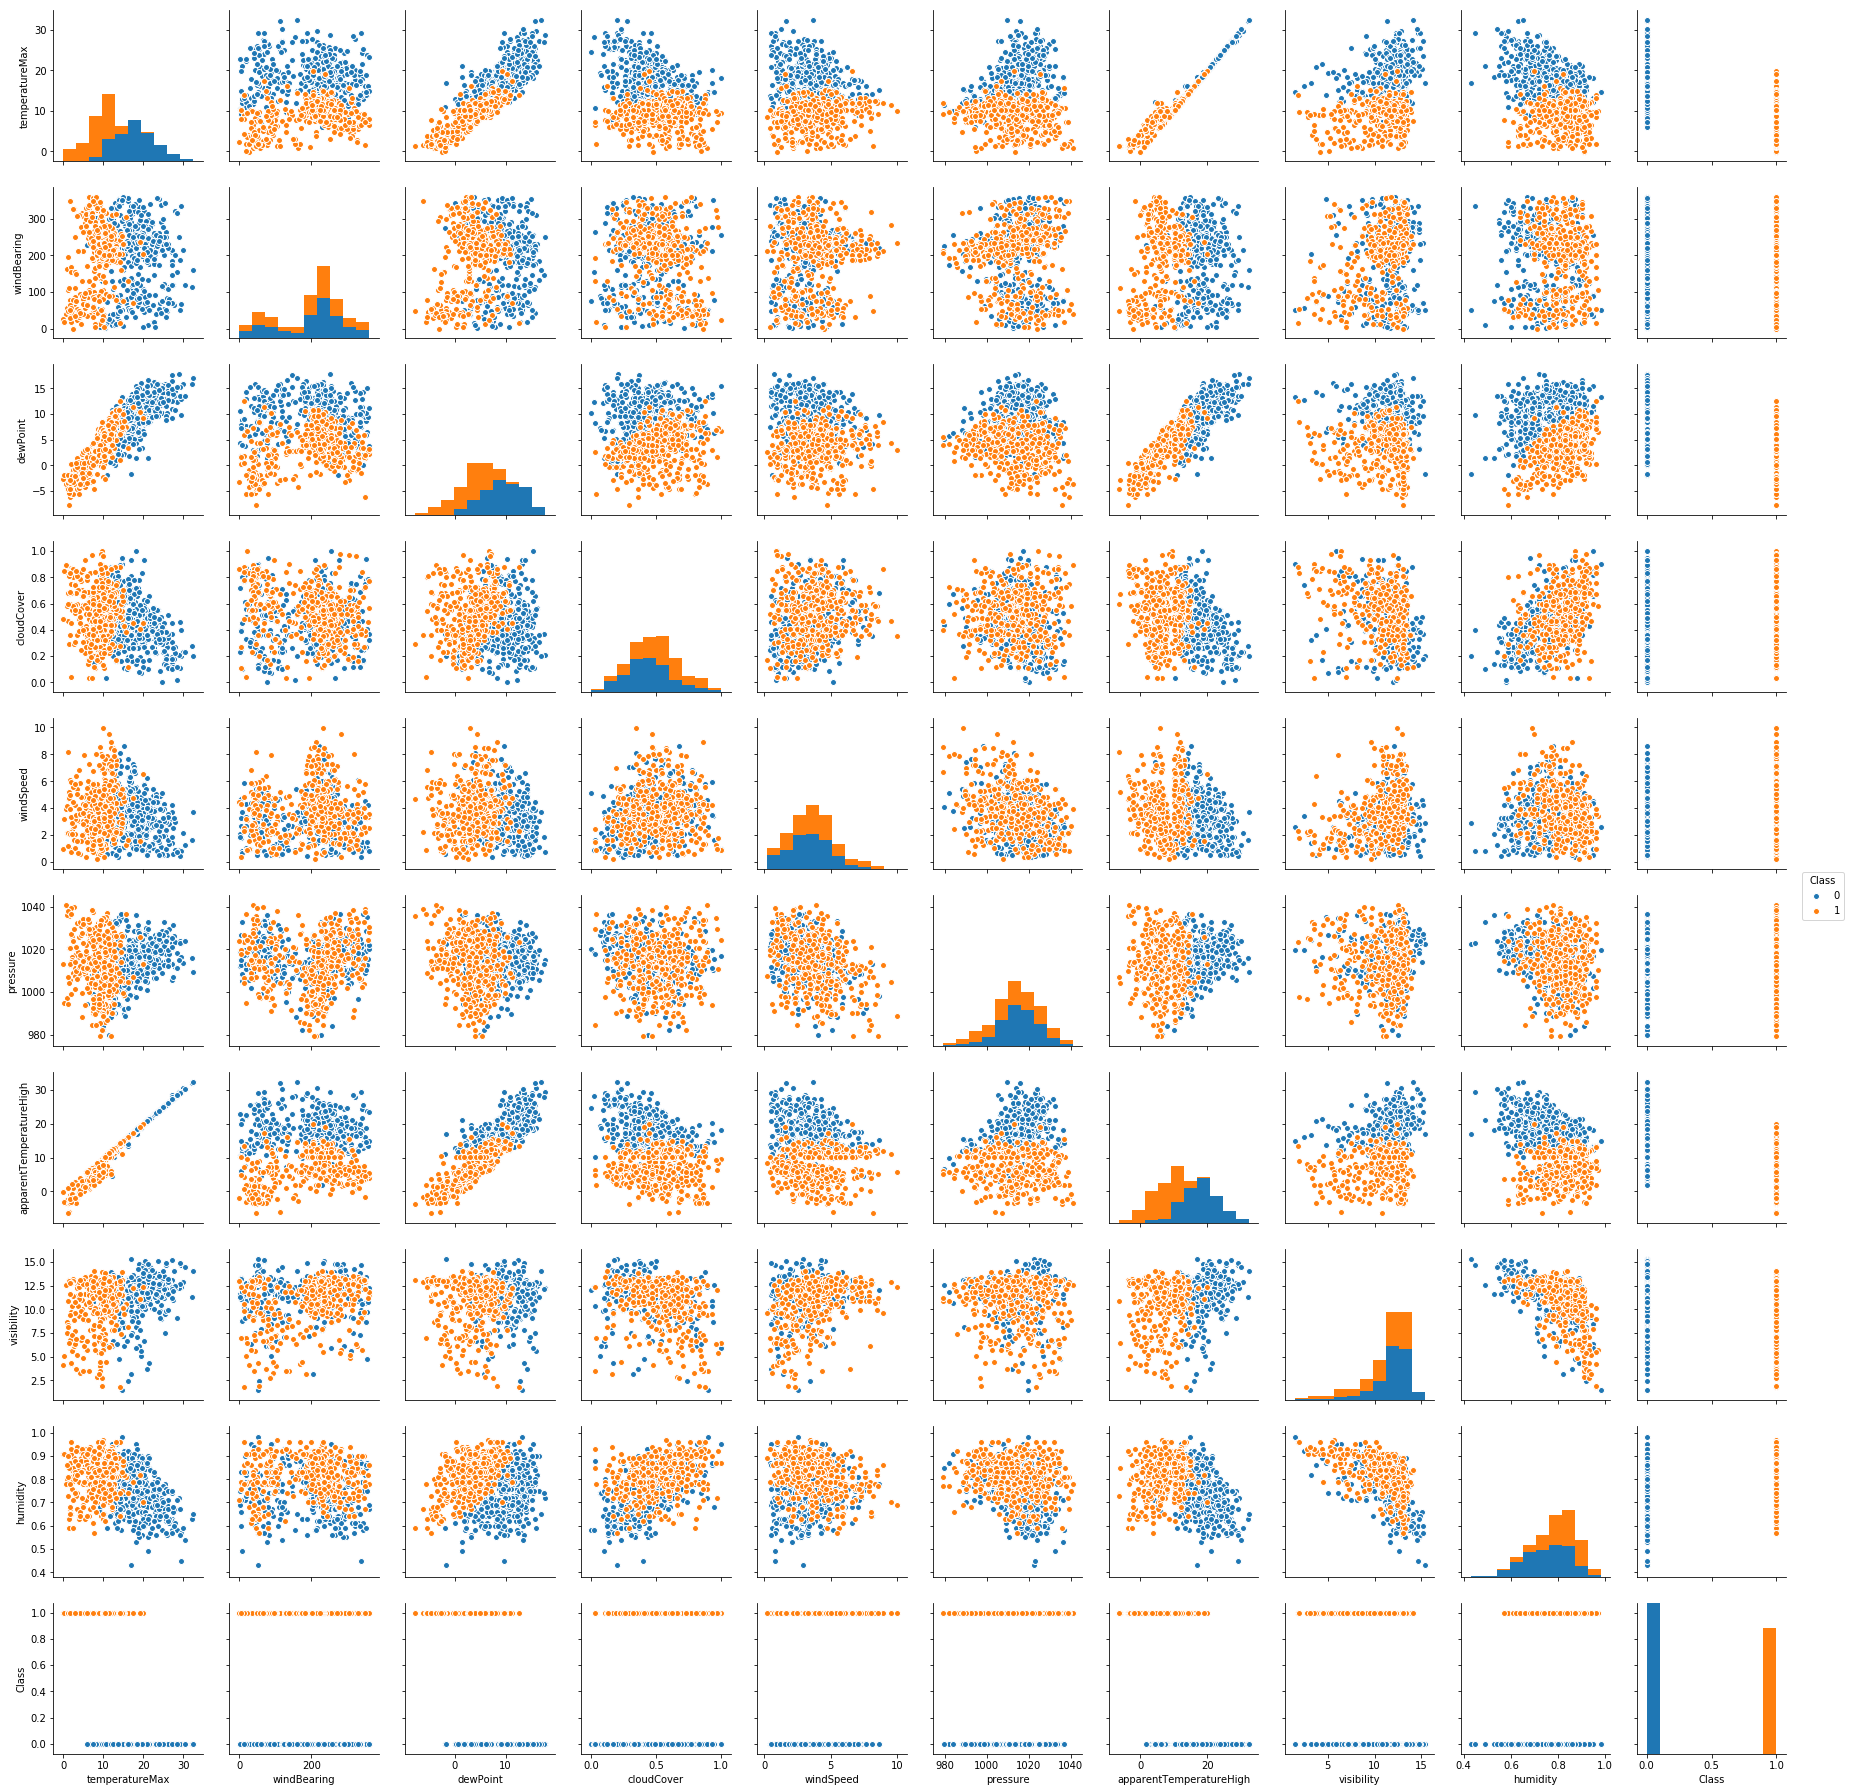

In [62]:
#ok so the energy cols and the class variable look very correllated. Lets have a quick check of the weather cols
cols2 = [x for x in combined.columns if "energy" not in x]
mid = len(cols2)//2
firsthalf = cols2[:mid]
firsthalf.append("Class")
secondhalf = cols2[mid:]
sns.pairplot(data=combined[firsthalf],hue='Class')

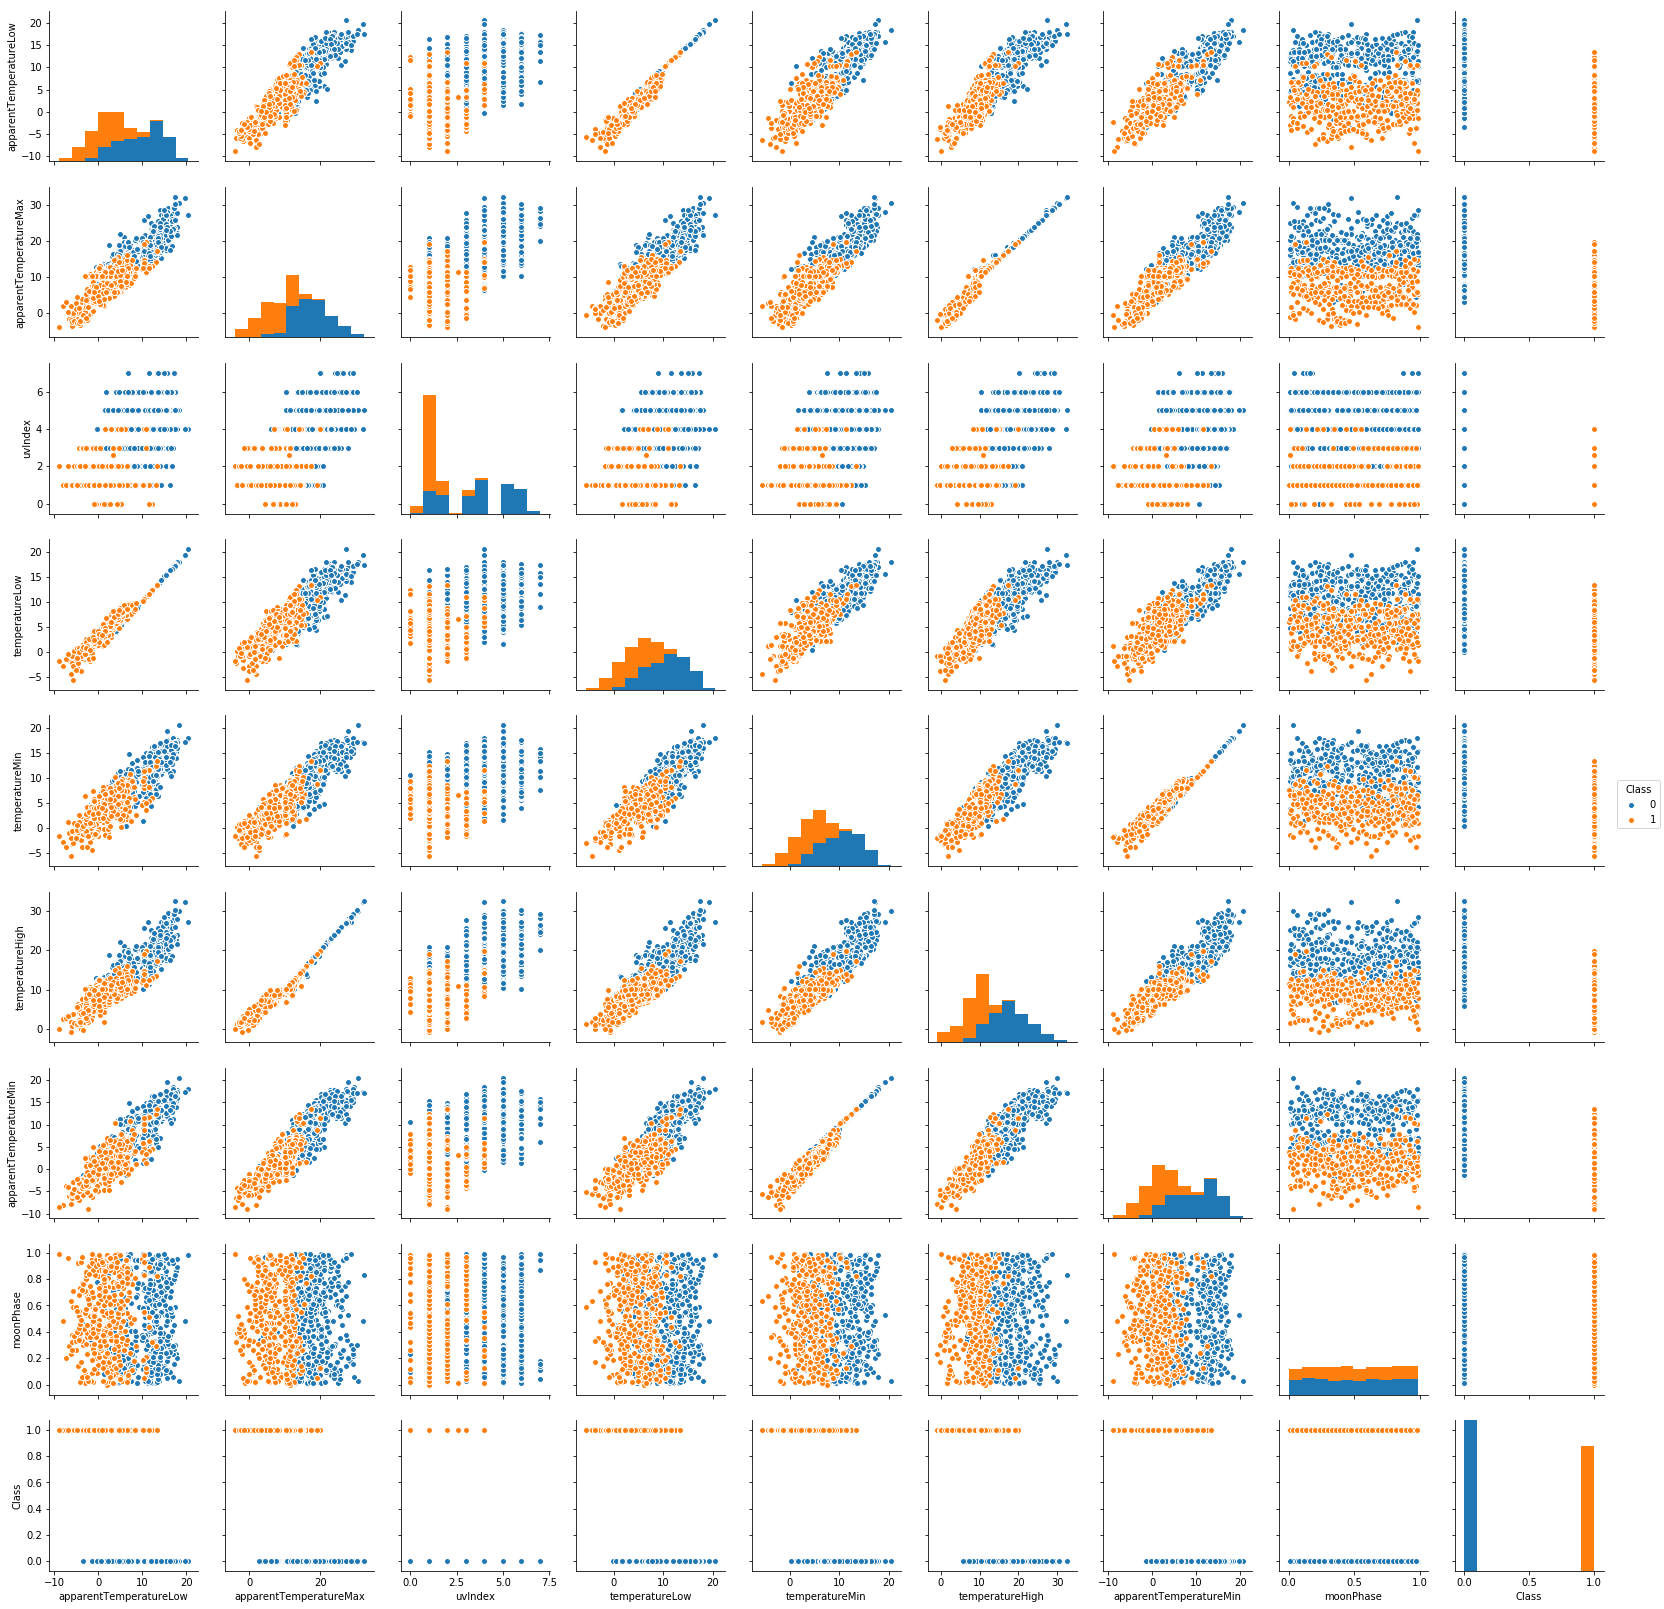

In [63]:
sns.pairplot(data=combined[secondhalf],hue='Class')

In [64]:
# I'm choosing all the numerical columns except energy related ones because the Class column was already derived from something
# energy related.
combined2 = combined.drop([x for x in combined.columns if "energy" in x],axis=1)
train3 = combined2[combined2.index.year < 2014]
test3 = combined2[combined2.index.year == 2014]

In [65]:
X_train = train3[combined2.columns[:-1]]
X_test = test3[combined2.columns[:-1]]
y_train = train3['Class']
y_test = test3['Class']

In [66]:
# going with logistic regression since we want a basic binary classifier and have some continuous data.
# We probably wont have much true 0's to classify though.
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.97      0.98      0.97        57

avg / total       0.93      0.95      0.94        59



0.9739130434782608

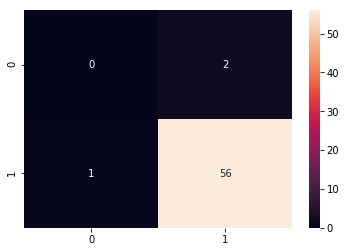

In [68]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
f1_score(y_pred,y_test) # false positives and negatives